# Narratives

In [1]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from tqdm import tqdm

In [2]:
df = pd.read_csv("../data/all-the-news-2-1.csv")

C:\Users\danie\AppData\Local\Temp\ipykernel_33548\1442822160.py:1: DtypeWarning: Columns (1,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/all-the-news-2-1.csv")


In [3]:
len(df)

2688879

In [4]:
df['length'] = df['article'].str.len()

In [5]:
df['publication'].value_counts()

publication
Reuters               840094
The New York Times    252259
CNBC                  238096
The Hill              208411
People                136488
CNN                   127602
Refinery 29           111433
Vice                  101137
Mashable               94107
Business Insider       57953
The Verge              52424
TechCrunch             52095
TMZ                    49595
Axios                  47815
Vox                    47272
Politico               46377
Washington Post        40882
Buzzfeed News          32819
Gizmodo                27228
Economist              26227
Wired                  20243
Fox News               20144
Vice News              15539
Hyperallergic          13551
New Republic           11809
New Yorker              4701
Name: count, dtype: int64

In [6]:
df["length"].describe()

count    2.584165e+06
mean     3.120996e+03
std      3.375865e+03
min      1.000000e+00
25%      1.154000e+03
50%      2.336000e+03
75%      4.058000e+03
max      2.247880e+05
Name: length, dtype: float64

<Axes: >

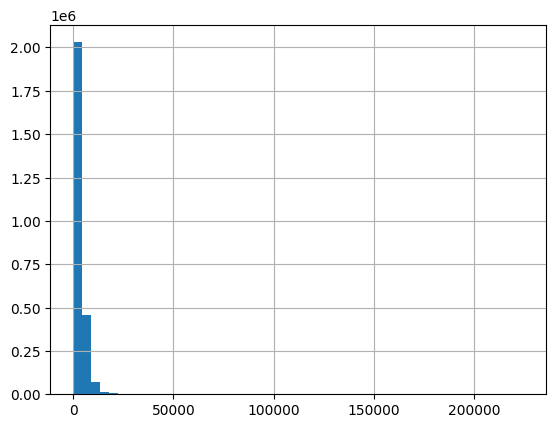

In [7]:
df["length"].hist(bins=50)

In [8]:
df_scope = df[df['article'].isna()==False]

In [9]:
df_scope.head()

,Unnamed: 0.1,Unnamed: 0,date,year,month,day,author,title,article,url,section,publication,length
0,0,0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",https://www.vox.com/polyarchy/2016/12/9/138983...,NaN,Vox,6499.0
1,1,1,2016-10-07 21:26:46,2016,10.0,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,https://www.businessinsider.com/colts-gm-ryan-...,NaN,Business Insider,1602.0
2,2,2,2018-01-26 00:00:00,2018,1.0,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",https://www.reuters.com/article/us-davos-meeti...,Davos,Reuters,500.0
3,3,3,2019-06-27 00:00:00,2019,6.0,27,NaN,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,https://www.reuters.com/article/france-politic...,World News,Reuters,2348.0
4,4,4,2016-01-27 00:00:00,2016,1.0,27,NaN,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,https://www.tmz.com/2016/01/27/paris-hilton-mo...,NaN,TMZ,420.0


In [10]:
df_scope["year"].value_counts().head(10)

year
2017    635680
2016    595050
2019    564570
2018    547137
2020    189978
2019     51611
2017       105
2018        22
2016        12
Name: count, dtype: int64

In [11]:
len(df_scope)

2584165

In [12]:
len(df_scope[df_scope['length'] > 1500])

1759870

### Basic filtering
Length and year

In [13]:
df_scope = df[df['year']==2019]

In [14]:
df_scope = df_scope[df_scope['length'] > 1500]

<Axes: >

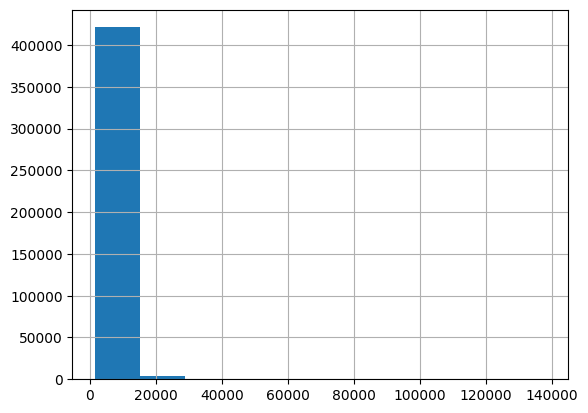

In [15]:
df_scope['length'].hist()

### Categories map for ground truth

In [16]:
df_scope["publication"].value_counts().head(10)

publication
Reuters               105061
CNBC                   61830
The New York Times     49383
The Hill               45689
CNN                    32937
People                 28894
TechCrunch              9763
Mashable                9647
Refinery 29             8960
Politico                8894
Name: count, dtype: int64

In [17]:
df_scope[df_scope['publication'] == "Reuters"]['section'].value_counts().head(10)

section
Business News    22155
World News       19652
Sports News       5598
Market News       4141
Politics          3474
Commodities       3327
Bonds News        3077
Big Story 10      2434
Deals             2327
Asia              2259
Name: count, dtype: int64

In [18]:
df_scope[df_scope['publication'] == "The New York Times"]['section'].value_counts().head(10)

section
us          7939
world       5740
opinion     5134
arts        4266
sports      3623
business    3151
nyregion    2156
books       1762
movies      1337
style       1177
Name: count, dtype: int64

In [19]:
df_scope[df_scope['publication'] == "CNBC"]['section'].value_counts().head(10)

section
Wires                 31822
Tech                   3210
Politics               3044
Markets                1702
Market Insider          842
Personal Finance        827
Retail                  756
Investing               659
Health and Science      631
Autos                   615
Name: count, dtype: int64

In [20]:
df_scope[df_scope['publication'] == "CNN"]['section'].value_counts().head(10)

section
politics         10729
us                6201
opinions          2067
health            1916
entertainment     1862
business          1816
tech              1648
investing         1194
asia              1193
world              903
Name: count, dtype: int64

In [21]:
df_scope[df_scope['publication'] == "People"]['section'].value_counts().head(10)

section
tv                5499
movies            3173
music             2969
parents           2575
crime             2454
style             2239
human-interest    1737
royals            1457
sports            1196
health            1193
Name: count, dtype: int64

In [22]:
SECTION_MAP = {
    "Business News": "Business", # Reuters
    "Wires": "Business", # CNBC
    "business": "Business", # CNN, NYT

    "Politics": "Politics", # Reuters, CNBC
    "politics": "Politics", # CNN

    "tech": "Tech", # CNN
    "tech": "Tech", # CNBC

    "world": "World", # NYT
    "World News": "World", # Reuters

    "sports": "Sports", # People, NYT
    "Sports News": "Sports", # Reuters
    
    "movies": "Movies" # People, NYT
}


In [23]:
df_scope["section_clean"] = (
    df_scope["section"]
    .fillna("unknown")
    .astype(str)
    .str.strip()
)

In [24]:
def unify_section(section):
    for key, unified in SECTION_MAP.items():
        if key in section:
            return unified
    return "Other"

In [25]:
df_scope["section_unified"] = df_scope["section_clean"].apply(unify_section)


In [26]:
df_scope["section_unified"].value_counts()

section_unified
Other       302789
Business     59668
World        26551
Politics     19360
Sports       10427
Movies        4517
Tech          3076
Name: count, dtype: int64

In [27]:
SECTIONS = [
    "Business",
    "World",
    "Politics",
    "Sports",
    "Movies",
    "Tech",
]


In [28]:
df_filt = df_scope[df_scope["section_unified"].isin(SECTIONS)]

In [29]:
import pandas as pd

df_sample = (
    df_filt
    .groupby("section_unified", group_keys=False)
    .apply(
        lambda x: x.sample(
            n=2000,
            random_state=42
        )
    )
)


C:\Users\danie\AppData\Local\Temp\ipykernel_33548\1083793139.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


In [30]:
df_sample['section_unified'].value_counts()

section_unified
Business    2000
Movies      2000
Politics    2000
Sports      2000
Tech        2000
World       2000
Name: count, dtype: int64

In [31]:
len(df_sample)

12000

<Axes: >

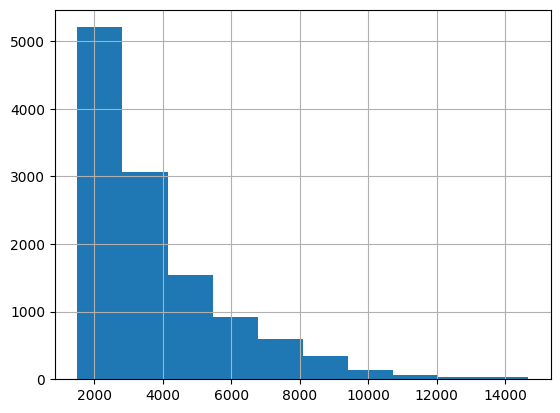

In [32]:
df_sample[df_sample['length']<15000]['length'].hist()

In [33]:
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12
})

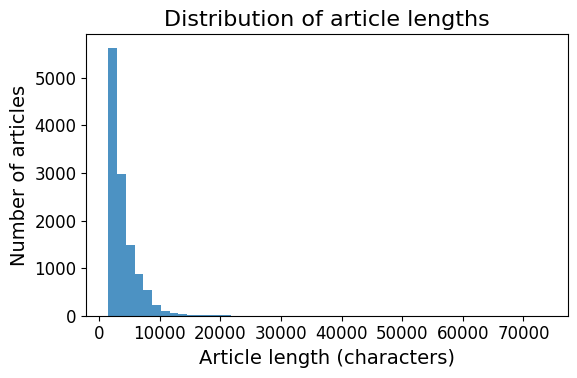

In [36]:
plt.figure(figsize=(6, 4))

plt.hist(
    df_sample["length"],
    bins=50,
    alpha=0.8
)

plt.xlabel("Article length (characters)")
plt.ylabel("Number of articles")
plt.title("Distribution of article lengths")

plt.tight_layout()

plt.savefig(
    "article_length_histogram.png",
    dpi=300,
    transparent=True
)

plt.show()


In [37]:
df_sample[df_sample['length']>13000].iloc[1]['article']

'Mr. Volcker helped shape American economic policy for decades, notably by leading the Federal Reserve’s brute-force campaign to subdue inflation in the 1970s and ’80s. Paul A. Volcker, who helped shape American economic policy for more than six decades, most notably by leading the Federal Reserve’s brute-force campaign to subdue inflation in the late 1970s and early ’80s, died on Sunday in New York. He was 92. The death was confirmed by his daughter, Janice Zima, who did not specify the cause. Mr. Volcker had been treated for prostate cancer, which was diagnosed in 2018. Mr. Volcker, a towering, taciturn and somewhat rumpled figure, arrived in Washington as America’s postwar economic hegemony was beginning to crumble. He would devote his professional life to wrestling with the consequences. As a Treasury Department official under Presidents John F. Kennedy, Lyndon B. Johnson and Richard M. Nixon, Mr. Volcker waged a long, losing struggle to preserve the postwar international monetary 

In [38]:
df_sample.iloc[100:104]

,Unnamed: 0.1,Unnamed: 0,date,year,month,day,author,title,article,url,section,publication,length,section_clean,section_unified
14525,14525,14525,2019-06-12 00:00:00,2019,6.0,12,Jonathan Stempel,"Zell, other former Tribune executives reach $2...",(Reuters) - Real estate billionaire Sam Zell a...,https://www.reuters.com/article/tribune-settle...,Business News,Reuters,2257.0,Business News,Business
1600480,1600480,1600480,2019-02-15,2019,2.0,15,NaN,UPDATE 2-Allianz may slow share buybacks in 20...,CFO@ * CFO says wouldn't necessarily count on ...,https://www.cnbc.com/2019/02/15/reuters-americ...,Wires,CNBC,2961.0,Wires,Business
1630479,1630479,1630479,2019-04-26,2019,4.0,26,NaN,UPDATE 4-ADM considers ethanol spinoff as Q1 p...,"(Adds executives' comments, trade war, share p...",https://www.cnbc.com/2019/04/26/reuters-americ...,Wires,CNBC,3226.0,Wires,Business
1625385,1625385,1625385,2019-04-10,2019,4.0,10,NaN,"China, Hong Kong stocks fall amid global slowd...","* SSEC -0.4 pct, CSI300 -0.4 pct, HSI -0.4 pct...",https://www.cnbc.com/2019/04/10/reuters-americ...,Wires,CNBC,2811.0,Wires,Business


## Semantic Embeddings

In [39]:
texts = df_sample['article'].to_list()

In [40]:
texts[100]

'(Reuters) - Real estate billionaire Sam Zell and other former officers and directors of Tribune Co have reached a $200 million settlement resolving allegations of fraudulent transactions related to the media company’s disastrous 2007 leveraged buyout.  Marc Kirschner, a litigation trustee representing Tribune creditors, filed the proposed settlement on May 31 with the U.S. bankruptcy court in Wilmington, Delaware. The accord requires court approval, and a hearing is scheduled for July 11.  Roughly 50 defendants, including former Chief Executive Dennis FitzSimons, agreed to the settlement, without admitting liability or wrongdoing.  Lawyers for Zell and FitzSimons did not immediately respond on Wednesday to requests for comment.  Zell took Tribune private in an $8.2 billion buyout in December 2007 that saddled the Chicago-based owner of the Chicago Tribune, Los Angeles Times, Baltimore Sun and WGN superstation with too much debt.  Tribune filed for Chapter 11 bankruptcy protection a ye

In [41]:
model = SentenceTransformer("all-MiniLM-L6-v2", device="cuda")

In [42]:
embeddings = model.encode(
    texts,
    show_progress_bar=True,
    batch_size=64,
    normalize_embeddings=True
)

Batches: 100%|██████████| 188/188 [00:15<00:00, 12.21it/s]


In [43]:
len(embeddings[0])

384

In [44]:
import umap

umap_model = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    metric="cosine",
    random_state=42
)

embeddings_2d = umap_model.fit_transform(embeddings)

d:\NLP\.nlp\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [45]:
embeddings_2d

array([[-3.3046417,  5.052127 ],
       [-1.4323444,  3.267523 ],
       [-3.1372652,  2.7262664],
       ...,
       [-0.6217389,  3.467561 ],
       [-1.3682321,  7.60788  ],
       [-1.1083194,  7.836863 ]], shape=(12000, 2), dtype=float32)

In [46]:
df_vis = df_sample.copy()  # or df_scope / df_filtered

df_vis["x"] = embeddings_2d[:, 0]
df_vis["y"] = embeddings_2d[:, 1]

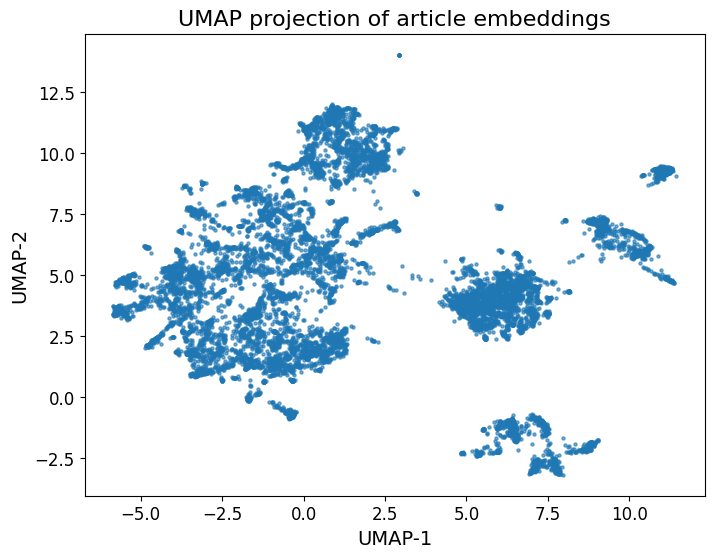

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(df_vis["x"], df_vis["y"], s=5, alpha=0.6)
plt.title("UMAP projection of article embeddings")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")

plt.savefig(
    "umap.png",
    dpi=300,
    transparent=True
)

plt.show()

In [51]:
df_sample['section_unified'].value_counts()

section_unified
Business    2000
Movies      2000
Politics    2000
Sports      2000
Tech        2000
World       2000
Name: count, dtype: int64

In [52]:
df_sample['publication'].value_counts()

publication
Reuters               3879
The New York Times    2358
CNN                   2302
People                1775
CNBC                  1509
Economist              160
Wired                   10
Gizmodo                  4
The Verge                3
Name: count, dtype: int64

## Sentiment, bias, subjectivity, framing

In [54]:
from transformers import pipeline

In [56]:
torch.cuda.is_available()

True

In [55]:
device = 0 if torch.cuda.is_available() else -1

sentiment_pipe = pipeline(
    "text-classification",
    model="cardiffnlp/twitter-roberta-base-sentiment",
    device=device
)

bias_pipe = pipeline(
    "text-classification",
    model="newsmediabias/UnBIAS-classifier",
    device=device
)

subjectivity_pipe = pipeline(
    "text-classification",
    model="GroNLP/mdebertav3-subjectivity-multilingual",
    device=device
)

framing_labels = [
    "economic consequences",
    "conflict",
    "human interest",
    "policy and governance",
    "morality",
    "neutral factual reporting"
]

framing_pipe = pipeline(
    "zero-shot-classification",
    model="cross-encoder/nli-deberta-v3-small",
    device=device
)


d:\NLP\.nlp\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\danie\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cuda:0
d:\NLP\.nlp\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingf

In [58]:
MAX_CHARS = 512

df_sample["discourse_text"] = (
    df_sample["article"]
    .astype(str)
    .str.slice(0, MAX_CHARS)
)

In [59]:
df_sample['discourse_text']

255114     BEIJING (Reuters) - China’s second-quarter eco...
1409981    GENEVA (Reuters) - China and the United States...
1022957    New York (CNN Business)The remains of defunct ...
1653004    * Ministers fret digital coins will rival sove...
1654660    * Euro sags below $1.12 to lowest since late M...
                                 ...                        
1502011    SEOUL (Reuters) - A top confidant of South Kor...
2277030    BERLIN (Reuters) - The far-right Alternative f...
2226821    WASHINGTON (Reuters) - U.S. Secretary of State...
2265189    News Analysis All the warnings were there. But...
1216575    WASHINGTON (Reuters) - U.S. President Donald T...
Name: discourse_text, Length: 12000, dtype: object

In [60]:
def run_batch(pipe, texts, batch_size=16, **kwargs):
    outputs = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i + batch_size]
        out = pipe(batch, **kwargs)
        outputs.extend(out)
    return outputs


In [62]:
sentiment_outputs = run_batch(
    sentiment_pipe,
    df_sample["discourse_text"].tolist(),
    batch_size=64,
    truncation=True,
    max_length=512
)

df_sample["sentiment_label"] = [o["label"] for o in sentiment_outputs]
df_sample["sentiment_score"] = [o["score"] for o in sentiment_outputs]

100%|██████████| 188/188 [02:16<00:00,  1.38it/s]


In [63]:
df_sample['sentiment_label'].value_counts()

sentiment_label
LABEL_1    6787
LABEL_0    2697
LABEL_2    2516
Name: count, dtype: int64

In [64]:
bias_outputs = run_batch(
    bias_pipe,
    df_sample["discourse_text"].tolist(),
    batch_size=64,
    truncation=True,
    max_length=512
)

df_sample["bias_label"] = [o["label"] for o in bias_outputs]
df_sample["bias_score"] = [o["score"] for o in bias_outputs]

100%|██████████| 188/188 [02:17<00:00,  1.37it/s]


In [65]:
df_sample['bias_label'].value_counts()

bias_label
Highly Biased      11930
Slightly Biased       70
Name: count, dtype: int64

In [66]:
subjectivity_outputs = run_batch(
    subjectivity_pipe,
    df_sample["discourse_text"].tolist(),
    batch_size=64,
    truncation=True,
    max_length=512
)

df_sample["subjectivity_label"] = [o["label"] for o in subjectivity_outputs]
df_sample["subjectivity_score"] = [o["score"] for o in subjectivity_outputs]

100%|██████████| 188/188 [06:14<00:00,  1.99s/it]


In [67]:
df_sample['subjectivity_label'].value_counts()

subjectivity_label
LABEL_0    10957
LABEL_1     1043
Name: count, dtype: int64

In [68]:
framing_outputs = run_batch(
    framing_pipe,
    df_sample["discourse_text"].tolist(),
    batch_size=8,
    candidate_labels=framing_labels,
    truncation=True,
    max_length=512,
    multi_label=False
)

df_sample["frame"] = [o["labels"][0] for o in framing_outputs]
df_sample["frame_score"] = [o["scores"][0] for o in framing_outputs]

100%|██████████| 1500/1500 [19:26<00:00,  1.29it/s]


In [69]:
df_sample['frame'].value_counts()

frame
conflict                     6984
economic consequences        2103
human interest               1967
neutral factual reporting     700
policy and governance         215
morality                       31
Name: count, dtype: int64

In [70]:
df_sample.to_csv(
    "df_sample_with_features.csv",
    index=False
)

In [71]:
df_sample.head()

,Unnamed: 0.1,Unnamed: 0,date,year,month,day,author,title,article,url,...,section_unified,discourse_text,sentiment_label,sentiment_score,bias_label,bias_score,subjectivity_label,subjectivity_score,frame,frame_score
255114,255114,255114,2019-07-11 00:00:00,2019,7.0,11,Kevin Yao,China second-quarter GDP growth seen easing to...,BEIJING (Reuters) - China’s second-quarter eco...,https://www.reuters.com/article/us-china-econo...,...,Business,BEIJING (Reuters) - China’s second-quarter eco...,LABEL_0,0.487346,Highly Biased,0.975026,LABEL_0,0.986111,economic consequences,0.390499
1409981,1409981,1409981,2019-01-31,2019,1.0,31,NaN,"U.S., China take the lead in race for artifici...",GENEVA (Reuters) - China and the United States...,https://www.reuters.com/article/us-tech-un/us-...,...,Business,GENEVA (Reuters) - China and the United States...,LABEL_2,0.761321,Highly Biased,0.861212,LABEL_0,0.983237,economic consequences,0.252139
1022957,1022957,1022957,2019-04-18,2019,4.0,18,Chris Isidore,Sears sues former CEO Eddie Lampert for 'theft...,New York (CNN Business)The remains of defunct ...,https://www.cnn.com/2019/04/18/business/sears-...,...,Business,New York (CNN Business)The remains of defunct ...,LABEL_1,0.536172,Highly Biased,0.978282,LABEL_0,0.981646,conflict,0.450717
1653004,1653004,1653004,2019-07-17,2019,7.0,17,NaN,UPDATE 2-G7 finance chiefs pour cold water on ...,* Ministers fret digital coins will rival sove...,https://www.cnbc.com/2019/07/17/reuters-americ...,...,Business,* Ministers fret digital coins will rival sove...,LABEL_1,0.601722,Highly Biased,0.978213,LABEL_0,0.966375,conflict,0.580117
1654660,1654660,1654660,2019-07-23,2019,7.0,23,NaN,"FOREX-Dollar hits to five-week peak on debt, b...",* Euro sags below $1.12 to lowest since late M...,https://www.cnbc.com/2019/07/23/reuters-americ...,...,Business,* Euro sags below $1.12 to lowest since late M...,LABEL_1,0.744484,Highly Biased,0.941023,LABEL_0,0.984891,economic consequences,0.424570


## Encodings

In [72]:
SENTIMENT_MAP = {
    "LABEL_2": -1,   # negative
    "LABEL_0":  0,   # neutral
    "LABEL_1":  1    # positive
}

df_sample["sentiment_value"] = df_sample["sentiment_label"].map(SENTIMENT_MAP)


In [73]:
SUBJECTIVITY_MAP = {
    "LABEL_0": 0,  # objective
    "LABEL_1": 1   # subjective
}

df_sample["subjective"] = df_sample["subjectivity_label"].map(SUBJECTIVITY_MAP)

In [74]:
BIAS_MAP = {
    "Slightly Biased": 0,
    "Highly Biased": 1
}

df_sample["bias_value"] = df_sample["bias_label"].map(BIAS_MAP)

In [75]:
FRAME_MAP = {
    "conflict": 0,
    "economic consequences": 1,
    "human interest": 2,
    "neutral factual reporting": 3,
    "policy and governance": 4,
    "morality": 5
}

df_sample["frame_id"] = df_sample["frame"].map(FRAME_MAP)

In [76]:
df_sample.head()

,Unnamed: 0.1,Unnamed: 0,date,year,month,day,author,title,article,url,...,bias_label,bias_score,subjectivity_label,subjectivity_score,frame,frame_score,sentiment_value,subjective,bias_value,frame_id
255114,255114,255114,2019-07-11 00:00:00,2019,7.0,11,Kevin Yao,China second-quarter GDP growth seen easing to...,BEIJING (Reuters) - China’s second-quarter eco...,https://www.reuters.com/article/us-china-econo...,...,Highly Biased,0.975026,LABEL_0,0.986111,economic consequences,0.390499,0,0,1,1
1409981,1409981,1409981,2019-01-31,2019,1.0,31,NaN,"U.S., China take the lead in race for artifici...",GENEVA (Reuters) - China and the United States...,https://www.reuters.com/article/us-tech-un/us-...,...,Highly Biased,0.861212,LABEL_0,0.983237,economic consequences,0.252139,-1,0,1,1
1022957,1022957,1022957,2019-04-18,2019,4.0,18,Chris Isidore,Sears sues former CEO Eddie Lampert for 'theft...,New York (CNN Business)The remains of defunct ...,https://www.cnn.com/2019/04/18/business/sears-...,...,Highly Biased,0.978282,LABEL_0,0.981646,conflict,0.450717,1,0,1,0
1653004,1653004,1653004,2019-07-17,2019,7.0,17,NaN,UPDATE 2-G7 finance chiefs pour cold water on ...,* Ministers fret digital coins will rival sove...,https://www.cnbc.com/2019/07/17/reuters-americ...,...,Highly Biased,0.978213,LABEL_0,0.966375,conflict,0.580117,1,0,1,0
1654660,1654660,1654660,2019-07-23,2019,7.0,23,NaN,"FOREX-Dollar hits to five-week peak on debt, b...",* Euro sags below $1.12 to lowest since late M...,https://www.cnbc.com/2019/07/23/reuters-americ...,...,Highly Biased,0.941023,LABEL_0,0.984891,economic consequences,0.424570,1,0,1,1


In [81]:
df_sample["embedding"] = list(embeddings)

In [82]:
df_sample.head(1)

,Unnamed: 0.1,Unnamed: 0,date,year,month,day,author,title,article,url,...,bias_score,subjectivity_label,subjectivity_score,frame,frame_score,sentiment_value,subjective,bias_value,frame_id,embedding
255114,255114,255114,2019-07-11 00:00:00,2019,7.0,11,Kevin Yao,China second-quarter GDP growth seen easing to...,BEIJING (Reuters) - China’s second-quarter eco...,https://www.reuters.com/article/us-china-econo...,...,0.975026,LABEL_0,0.986111,economic consequences,0.390499,0,0,1,1,"[-0.04058828, -0.055673387, 0.081399396, 0.074..."


In [86]:
df_sample.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'date', 'year', 'month', 'day', 'author',
       'title', 'article', 'url', 'section', 'publication', 'length',
       'section_clean', 'section_unified', 'discourse_text', 'sentiment_label',
       'sentiment_score', 'bias_label', 'bias_score', 'subjectivity_label',
       'subjectivity_score', 'frame', 'frame_score', 'sentiment_value',
       'subjective', 'bias_value', 'frame_id', 'embedding'],
      dtype='object')

In [85]:
df_sample.to_csv(
    "df_sample_with_features.csv",
    index=False
)

In [3]:
df_sample = pd.read_csv("./df_sample_with_features.csv")

In [8]:
df_sample.head(1)

,Unnamed: 0.1,Unnamed: 0,date,year,month,day,author,title,article,url,...,bias_score,subjectivity_label,subjectivity_score,frame,frame_score,sentiment_value,subjective,bias_value,frame_id,embedding
0,255114,255114,2019-07-11 00:00:00,2019,7.0,11,Kevin Yao,China second-quarter GDP growth seen easing to...,BEIJING (Reuters) - China’s second-quarter eco...,https://www.reuters.com/article/us-china-econo...,...,0.975026,LABEL_0,0.986111,economic consequences,0.390499,0,0,1,1,[-4.05882783e-02 -5.56733869e-02 8.13993961e-...


In [4]:
KEEP_COLS = [
    "section_unified",
    "sentiment_value",
    "subjective",
    "bias_value",
    "frame_id",
    "embedding"
]

df_hf = df_sample[KEEP_COLS].copy()

In [5]:
df_hf["id"] = range(len(df_hf))
df_hf = df_hf[["id"] + KEEP_COLS]

In [9]:
df_hf

,id,section_unified,sentiment_value,subjective,bias_value,frame_id,embedding
0,0,Business,0,0,1,1,[-4.05882783e-02 -5.56733869e-02 8.13993961e-...
1,1,Business,-1,0,1,1,[-8.46627429e-02 -4.25676932e-04 5.96354306e-...
2,2,Business,1,0,1,0,[-2.76213791e-02 -6.34939522e-02 2.90779993e-...
3,3,Business,1,0,1,0,[-3.24641056e-02 -3.51335220e-02 -2.48142164e-...
4,4,Business,1,0,1,1,[-4.89977002e-02 -4.14977632e-02 -6.22200500e-...
...,...,...,...,...,...,...,...
11995,11995,World,0,0,1,0,[-5.90538383e-02 5.65499961e-02 8.46735388e-...
11996,11996,World,1,0,1,0,[ 5.78789692e-03 -3.02154962e-02 3.23972739e-...
11997,11997,World,0,0,1,0,[ 1.01636471e-02 6.51796609e-02 -1.22244447e-...
11998,11998,World,0,1,1,0,[ 4.39927168e-02 -4.34000278e-03 5.95579334e-...


In [13]:
type(df_hf["embedding"].iloc[0])

str

In [16]:
def parse_embedding(x):
    if isinstance(x, str):
        x = x.strip()
        x = x.replace("[", "").replace("]", "")
        return np.array(
            [float(v) for v in x.split()],
            dtype=np.float32
        )
    return np.array(x, dtype=np.float32)
df_hf["embedding"] = df_hf["embedding"].apply(parse_embedding)

In [17]:
type(df_hf["embedding"].iloc[0])

numpy.ndarray